In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from tensorflow.keras.utils import to_categorical
from imblearn.combine import SMOTEENN, SMOTETomek
from itertools import cycle

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import pymorphy2
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chugu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_excel("data.xlsx")
df.head()

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,1,WSR/1-838/2019,2019-04-09,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,2019-04-09,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,2019-04-09,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,2019-04-09,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,2019-04-09,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN


In [3]:
df = df.drop(["№ п/п", "№\nдокумента"], axis=1)
df.head()

,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,2019-04-09,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2019-04-09,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,2019-04-09,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,2019-04-09,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,2019-04-09,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN


In [4]:
df = df.replace("\n", " ", regex=True)
df.head()

,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,2019-04-09,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2019-04-09,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,2019-04-09,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,2019-04-09,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,2019-04-09,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN


In [5]:
df = df.rename(columns={"Дата\nрегистрации": "Дата регистрации", "Исх. №\nДата": "Исх. № Дата", "Краткое\nсодержание": "Краткое содержание"})
df.head()

,Дата регистрации,Исх. № Дата,Адресат,Автор,Краткое содержание,Примечание
0,2019-04-09,208-409 08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2019-04-09,05-338 09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,2019-04-09,И10-14/3137 09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,2019-04-09,Д2/7121-ИС 03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,2019-04-09,15-20/06-911 08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN


In [6]:
date = []
for i, item in df.iterrows():
    cell = item["Исх. № Дата"]
    date.append(cell[cell.find(" ") + 1:])
df["Дата документа"] = date
df = df.drop(["Исх. № Дата"], axis=1)
df.head()

,Дата регистрации,Адресат,Автор,Краткое содержание,Примечание,Дата документа
0,2019-04-09,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN,08.04.2019
1,2019-04-09,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN,09.04.2019
2,2019-04-09,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN,09.04.2019
3,2019-04-09,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN,03.04.2019
4,2019-04-09,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN,08.04.2019


In [7]:
company = []
author = []
for i, item in df.iterrows():
    cell = item["Автор"]
    company.append(cell[cell.find("(") + 1:cell.find(")")])
    author.append(cell[:cell.find("(")])
df['Организация'] = company
df = df.drop(["Автор"], axis=1)
df["Автор"] = author
df.head()

,Дата регистрации,Адресат,Краткое содержание,Примечание,Дата документа,Организация,Автор
0,2019-04-09,Уразов Р.Н.,Вх - О возможности использования сетевого изда...,NaN,08.04.2019,АО «Интерфакс»,Антонова С.В.
1,2019-04-09,Уразов Р.Н.,Вх - Об участии в совещании по вопросу доработ...,NaN,09.04.2019,Министерство просвещения Российской Федерации,Картошкин С.А.
2,2019-04-09,Уразов Р.Н.,Вх - О командировании Саликовой К. и Глушко Д....,NaN,09.04.2019,Администрация Кемеровской области,Цивилев С.Е.
3,2019-04-09,Иванюк Л.А.,Вх - Об участии в Чемпионате мира по профессио...,NaN,03.04.2019,Министерство транспорта Российской Федерации,Волков Г.А.
4,2019-04-09,Уразов Р.Н.,Вх - Об участии в церемонии открытия Вузовског...,NaN,08.04.2019,Ставропольский государственный аграрный универ...,Атанов И.В.


In [8]:
len(set(df["Адресат"]))

161

In [9]:
df["Должность"] = ""
for i, item in df.iterrows():
    if item["Адресат"] == "Уразов Р.Н.":
        df.at[i, "Должность"] = "Ген. директор"
    elif item["Адресат"] == "Глушко Д.Е.":
        df.at[i, "Должность"] = "Ген. директор"
    elif item["Адресат"] == "Крайчинская С.Б.":
        df.at[i, "Должность"] = "Заместитель генерального директора по подготовке кадров"
    elif item["Адресат"] == "Лысова С.И.":
        df.at[i, "Должность"] = "Руководитель направления департамента по работе с образовательными организациями"
    elif item["Адресат"] == "Тымчиков А.Ю.":
        df.at[i, "Должность"] = "Технический директор"
    elif item["Адресат"] == "Никул Е.В.":
        df.at[i, "Должность"] = "Заместитель директора департамента маркетинга и партнерских отношений"
    elif item["Адресат"] == "Куколев С.В.":
        df.at[i, "Должность"] = "Начальник Управления по развитию движения Ворлдскиллс в Москве"
    elif item["Адресат"] == "Саликова К.В.":
        df.at[i, "Должность"] = "Заместитель генерального директора по организации чемпионатов по стандартам WS Федерального и Международного уровня"
    elif item["Адресат"] == "Митяева И.В.":
        df.at[i, "Должность"] = "Председатель комисии по закупкам"
    elif item["Адресат"] == "Недоспасова О.В.":
        df.at[i, "Должность"] = "Заместитель генерального директора по маркетингу и партнерским отношениям"
    elif item["Адресат"] == "Хворостяная И.В.":
        df.at[i, "Должность"] = "Заместитель генерального директора по коммуникациям"
    elif item["Адресат"] == "Мухаметзянов Д.Ф.":
        df.at[i, "Должность"] = "Административный директор"
    elif item["Адресат"] == "Уфимцев Д.А.":
        df.at[i, "Должность"] = "Директор Департамента оценки компетенций и квалификаций"
    elif item["Адресат"] == "Суперекин И.Ю.":
        df.at[i, "Должность"] = "Первый заместитель генерального директора"
    elif item["Адресат"] == "Иванюк Л.А.":
        df.at[i, "Должность"] = "Директор департамента регионального развития"

In [10]:
df.groupby(["Адресат"]).count().sort_values(["Дата регистрации"], ascending=False).head(20)

,Дата регистрации,Краткое содержание,Примечание,Дата документа,Организация,Автор,Должность
Адресат,,,,,,,
Глушко Д.Е.,1559,1559,78,1559,1559,1559,1559
Уразов Р.Н.,1465,1467,104,1467,1467,1467,1467
Крайчинская С.Б.,315,315,19,315,315,315,315
Лысова С.И.,234,234,6,234,234,234,234
Тымчиков А.Ю.,229,229,14,229,229,229,229
Никул Е.В.,131,131,6,131,131,131,131
Куколев С.В.,123,123,26,123,123,123,123
Саликова К.В.,97,97,4,97,97,97,97
Митяева И.В.,82,82,9,82,82,82,82


In [11]:
df.index

RangeIndex(start=0, stop=4967, step=1)

In [12]:
for i, item in df.iterrows():
    if item["Должность"] == "":
        df.at[i, "Должность"] = np.nan

In [13]:
df["Должность"].isna().sum()

486

In [14]:
df = df.dropna(subset=["Должность"])

In [15]:
df.index

Int64Index([   0,    1,    2,    3,    4,    6,    7,    8,    9,   10,
            ...
            4957, 4958, 4959, 4960, 4961, 4962, 4963, 4964, 4965, 4966],
           dtype='int64', length=4481)

In [16]:
df = df.drop(["Адресат"], axis=1)

In [17]:
df.head()

,Дата регистрации,Краткое содержание,Примечание,Дата документа,Организация,Автор,Должность
0,2019-04-09,Вх - О возможности использования сетевого изда...,NaN,08.04.2019,АО «Интерфакс»,Антонова С.В.,Ген. директор
1,2019-04-09,Вх - Об участии в совещании по вопросу доработ...,NaN,09.04.2019,Министерство просвещения Российской Федерации,Картошкин С.А.,Ген. директор
2,2019-04-09,Вх - О командировании Саликовой К. и Глушко Д....,NaN,09.04.2019,Администрация Кемеровской области,Цивилев С.Е.,Ген. директор
3,2019-04-09,Вх - Об участии в Чемпионате мира по профессио...,NaN,03.04.2019,Министерство транспорта Российской Федерации,Волков Г.А.,Директор департамента регионального развития
4,2019-04-09,Вх - Об участии в церемонии открытия Вузовског...,NaN,08.04.2019,Ставропольский государственный аграрный универ...,Атанов И.В.,Ген. директор


In [18]:
df = df.drop(["Примечание", "Дата регистрации", "Дата документа"], axis=1)

In [19]:
df.head()

,Краткое содержание,Организация,Автор,Должность
0,Вх - О возможности использования сетевого изда...,АО «Интерфакс»,Антонова С.В.,Ген. директор
1,Вх - Об участии в совещании по вопросу доработ...,Министерство просвещения Российской Федерации,Картошкин С.А.,Ген. директор
2,Вх - О командировании Саликовой К. и Глушко Д....,Администрация Кемеровской области,Цивилев С.Е.,Ген. директор
3,Вх - Об участии в Чемпионате мира по профессио...,Министерство транспорта Российской Федерации,Волков Г.А.,Директор департамента регионального развития
4,Вх - Об участии в церемонии открытия Вузовског...,Ставропольский государственный аграрный универ...,Атанов И.В.,Ген. директор


In [20]:
enc = LabelEncoder()
df["Организация"] = enc.fit_transform(df["Организация"])

In [21]:
enc = LabelEncoder()
df["Автор"] = enc.fit_transform(df["Автор"])

In [22]:
enc = LabelEncoder()
df["Должность"] = enc.fit_transform(df["Должность"])

In [23]:
df.head()

,Краткое содержание,Организация,Автор,Должность
0,Вх - О возможности использования сетевого изда...,102,67,1
1,Вх - Об участии в совещании по вопросу доработ...,759,592,1
2,Вх - О командировании Саликовой К. и Глушко Д....,139,1520,1
3,Вх - Об участии в Чемпионате мира по профессио...,771,252,3
4,Вх - Об участии в церемонии открытия Вузовског...,1140,89,1


In [24]:
morph = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words("russian")

def text_preprocess(text):
    tokens = text.lower().split()
    tokens = [morph.parse(token)[0].normal_form for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    text = " ".join(tokens)
    return text

for i, item in df.iterrows():
    text = item["Краткое содержание"]
    text = text.replace("Вх - ", "")
    text = text_preprocess(text)
    df.at[i, "Краткое содержание"] = text

In [25]:
df.head()

,Краткое содержание,Организация,Автор,Должность
0,"возможность использование сетевой издание ""инф...",102,67,1
1,участие совещание вопрос доработка фэо предост...,759,592,1
2,командирование саликов к. глушко д. участие за...,139,1520,1
3,участие чемпионат мир профессиональный мастерс...,771,252,3
4,участие церемония открытие вузовский чемпионат...,1140,89,1


In [26]:
all_text = df["Краткое содержание"]
tfidf = TfidfVectorizer(max_features=900)
tfidf_features = tfidf.fit_transform(df["Краткое содержание"])

In [123]:
num_features = df.drop(["Краткое содержание", "Должность"], axis=1)
y = df["Должность"]
num_features

,Организация,Автор
0,102,67
1,759,592
2,139,1520
3,771,252
4,1140,89
...,...,...
4962,191,889
4963,705,1282
4964,718,1018
4965,718,1018


In [28]:
def evaluate(x, y, model):
    fold = StratifiedKFold()
    x = cross_val_score(model, x, y, cv=fold, scoring="accuracy")
    return x

In [29]:
evaluate(tfidf_features, y, MultinomialNB())

array([0.72798216, 0.78459821, 0.77120536, 0.74553571, 0.7421875 ])

In [30]:
evaluate(num_features, y, RandomForestClassifier())

array([0.65440357, 0.6875    , 0.67410714, 0.66517857, 0.65290179])

In [29]:
def evaluate_mixed(tfidf_features, num_features, y, model_1, model_2):
    sfk = StratifiedKFold()
    for train_index, test_index in sfk.split(tfidf_features, y):
        model_1.fit(tfidf_features[train_index], y.to_numpy()[train_index])
        
        predicts = model_1.predict(tfidf_features[train_index]).reshape(-1, 1)
        train_x_2 = num_features.to_numpy()[train_index]
        train_x_2 = np.append(train_x_2, predicts, axis=1)
        
        model_2.fit(train_x_2, y.to_numpy()[train_index])
        
        predicts = model_1.predict(tfidf_features[test_index]).reshape(-1, 1)
        test_x_2 = num_features.to_numpy()[test_index]
        test_x_2 = np.append(test_x_2, predicts, axis=1)
        
        predicts = model_2.predict(test_x_2)
        print(accuracy_score(y.to_numpy()[test_index], predicts))

In [164]:
evaluate_mixed(tfidf_features, num_features, y, MultinomialNB(), RandomForestClassifier())

0.705685618729097
0.7834821428571429
0.734375
0.71875
0.7287946428571429


In [30]:
def evaluate_truncated(tfidf, num_features, y, model, n_comp):
    sfk = StratifiedKFold()
    svd = TruncatedSVD(n_components=n_comp, algorithm='arpack')
    tfidf_trunc = pd.DataFrame(svd.fit_transform(tfidf))
    concated = pd.concat((num_features.reset_index(), tfidf_trunc), axis=1)
    for train_index, test_index in sfk.split(tfidf_trunc, y):
        model.fit(concated.to_numpy()[train_index], y.to_numpy()[train_index])
        print(roc_auc_score(to_categorical(y.to_numpy()[test_index]), to_categorical(model.predict(concated.to_numpy()[test_index])), multi_class="ovr"))

In [37]:
def evaluate_truncated_smoten(tfidf, num_features, y, model, n_comp):
    sfk = StratifiedKFold()
    svd = TruncatedSVD(n_components=n_comp, algorithm='arpack')
    tfidf_trunc = pd.DataFrame(svd.fit_transform(tfidf))
    concated = pd.concat((num_features.reset_index(), tfidf_trunc), axis=1)
    smo = SMOTEENN(random_state=42, n_jobs=-1)
    Xr, yr = smo.fit_resample(concated, y)
#     Xr = Xr.to_numpy()
#     yr = yr.to_numpy()
    return Xr, yr
#     for train_index, test_index in sfk.split(tfidf_trunc, y):
#         model.fit(Xr[train_index], yr[train_index])
#         print(accuracy_score(yr[test_index], model.predict(Xr[test_index])))
#         print(roc_auc_score(to_categorical(yr[test_index]), to_categorical(model.predict(Xr[test_index])), multi_class="ovr"))

In [33]:
evaluate_truncated(tfidf_features, num_features, y, RandomForestClassifier(), 100)

0.6052847152871851
0.6676794094632547
0.6825803107507733
0.6774909647875512
0.6294038299502568


In [38]:
Xr, yr = evaluate_truncated_smoten(tfidf_features, num_features, y, RandomForestClassifier(), 100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [117]:
Xr_tr, Xr_t, yr_tr, yt_t = train_test_split(Xr, yr, test_size=0.3, random_state=42)
forest = RandomForestClassifier(n_jobs=-1, random_state=42)
forest.fit(Xr_tr, yr_tr)
roc_auc_score(to_categorical(yt_t), to_categorical(forest.predict(Xr_t)), multi_class="ovr")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9814629718205958

In [92]:
Xr_tr, Xr_t, yr_tr, yt_t = train_test_split(Xr, yr, test_size=0.3, random_state=42)
linear = GradientBoostingClassifier(random_state=42)
linear.fit(Xr_tr, yr_tr)
roc_auc_score(to_categorical(yt_t), to_categorical(linear.predict(Xr_t)), multi_class="ovr")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9734823702206897

<AxesSubplot:>

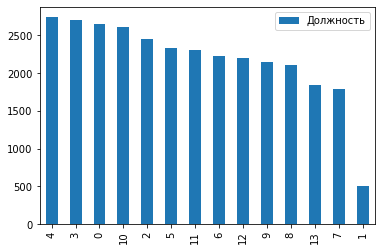

In [40]:
pd.DataFrame(yr.value_counts()).plot.bar()

<AxesSubplot:>

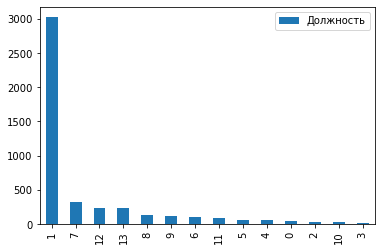

In [41]:
pd.DataFrame(y.value_counts()).plot.bar()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:>

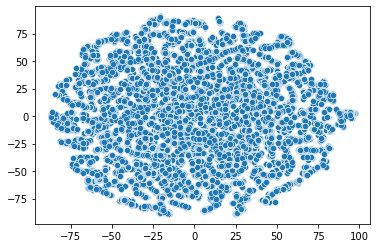

In [42]:
tsne = TSNE(n_jobs=-1)
X2D = tsne.fit_transform(Xr)
sns.scatterplot(x=X2D[:, 0], y=X2D[:, 1])

<AxesSubplot:>

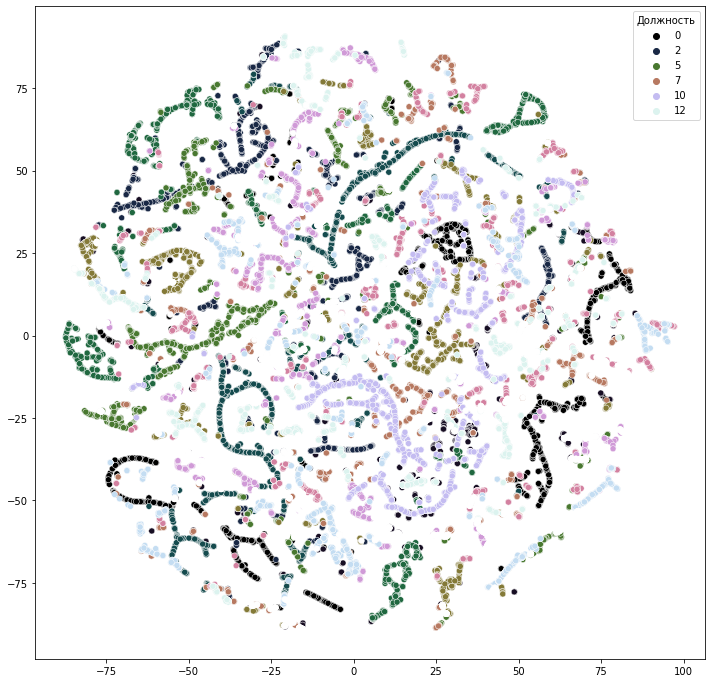

In [127]:
sns.scatterplot(x=X2D[:, 0], y=X2D[:, 1], hue=yr, palette="magma")

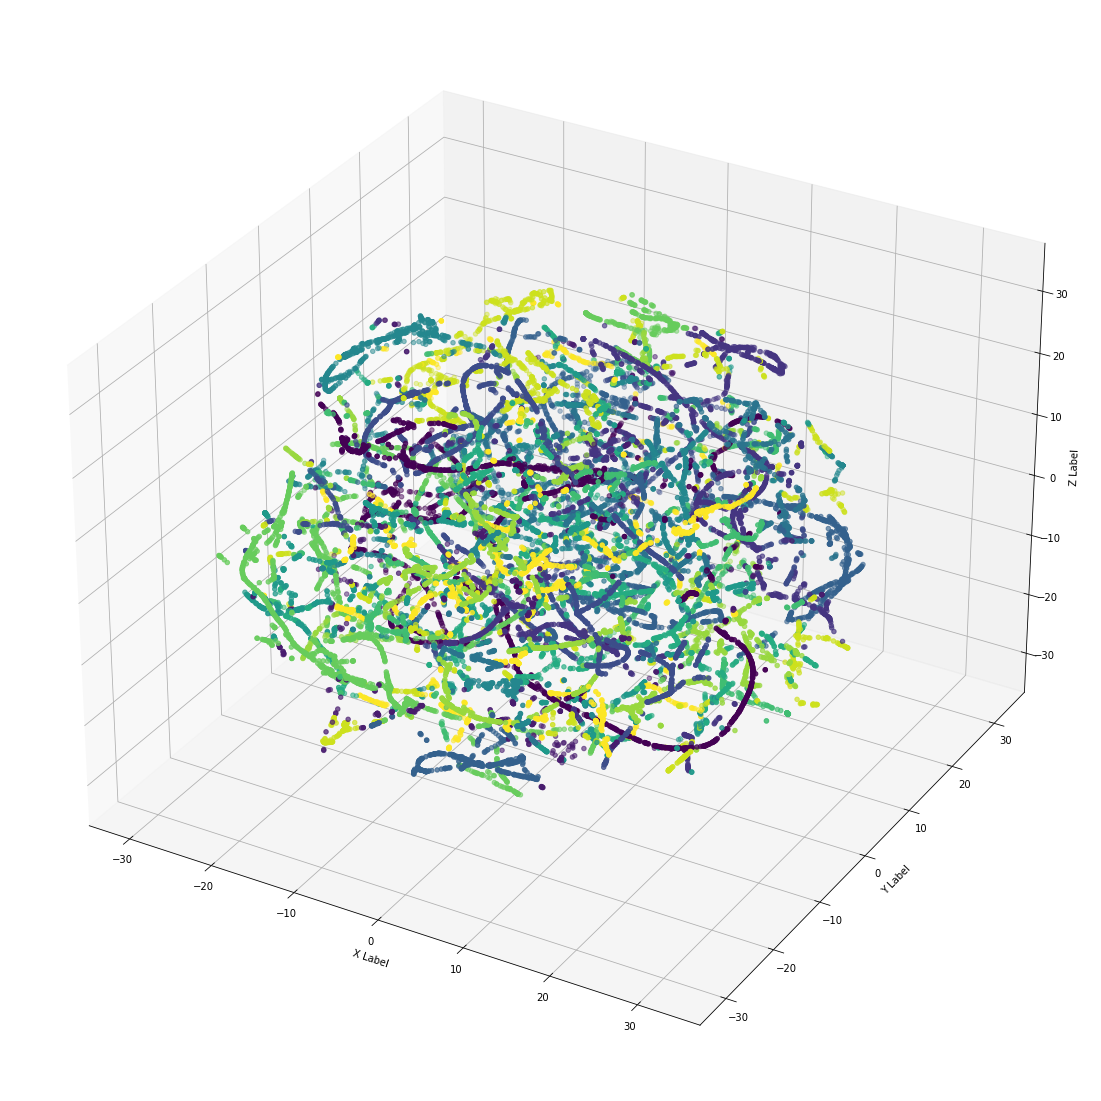

In [142]:
tsne = TSNE(n_jobs=-1, n_components=3)
X3D = tsne.fit_transform(Xr)
plt.rcParams["figure.figsize"] = (20,20)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X3D[:, 0], X3D[:, 1], X3D[:, 2], c=yr)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [43]:
svd = TruncatedSVD(n_components=100, algorithm='arpack')
tfidf_trunc = pd.DataFrame(svd.fit_transform(tfidf_features))
concated = pd.concat((num_features.reset_index(), tfidf_trunc), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:>

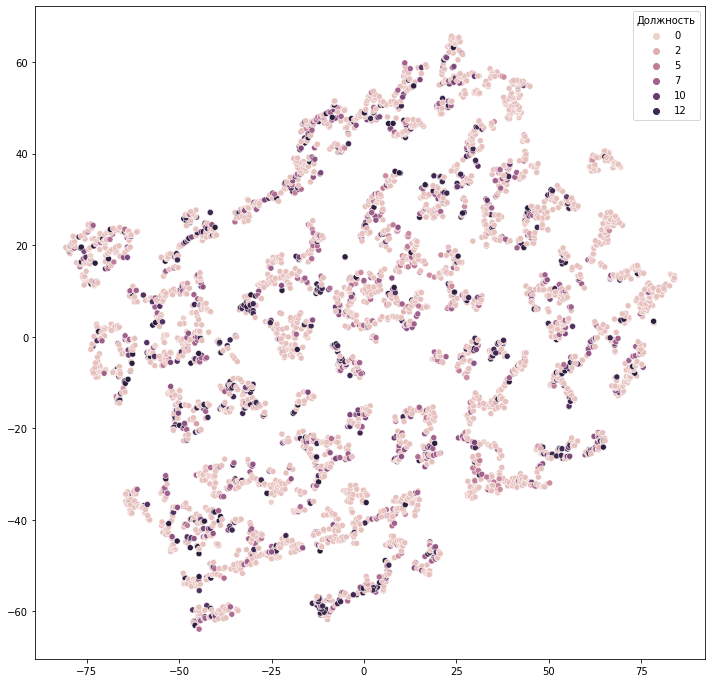

In [125]:
tsne = TSNE(n_jobs=-1)
concated2D = tsne.fit_transform(concated)
sns.scatterplot(x=concated2D[:, 0], y=concated2D[:, 1], hue=y, palette="magma")

In [118]:
predicts = to_categorical(forest.predict(Xr_t))
yt_tc = to_categorical(yt_t)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(14):
    fpr[i], tpr[i], _ = roc_curve(yt_tc[:, i], predicts[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(yt_tc.ravel(), predicts.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


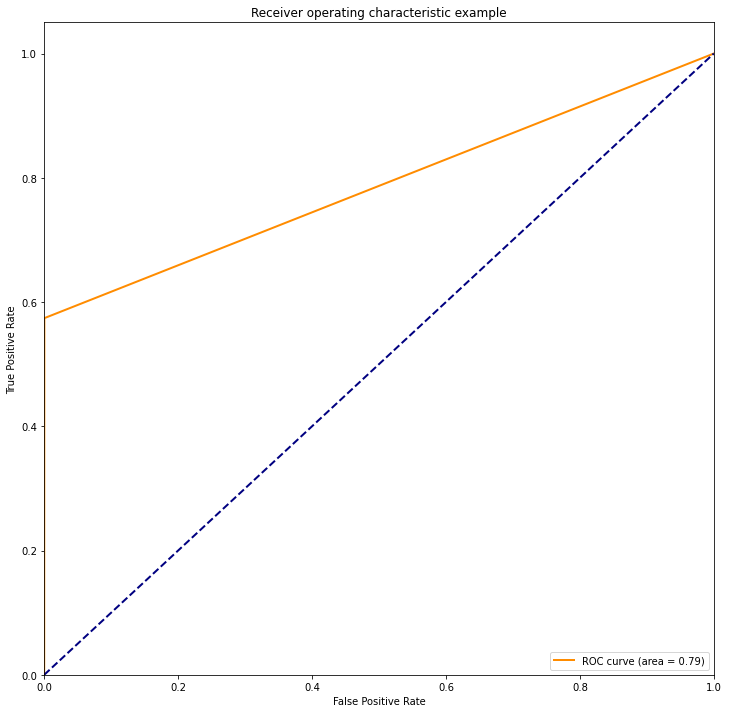

In [119]:
plt.figure()
lw = 2
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

<Figure size 1332x756 with 0 Axes>

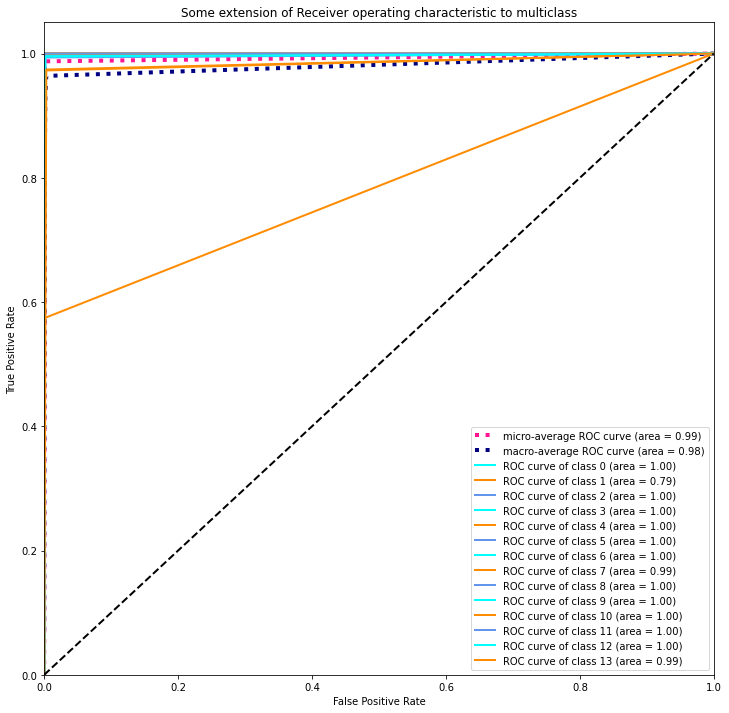

In [137]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.rcParams["figure.figsize"] = (12,12)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(14)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(14):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 14

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(14), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()